# Story data 
In this notebook, we will sketch out a tale worth telling. This notebook will mainly be used to generate figures and data for the oultine. Every block of code will have some info as to why the data/figure it generates are needed.

In [18]:
import psi4
import numpy as np
from scipy.linalg import eigh
from compChem import Hartree_fock
from compChem.CIS import CISMolecule

We will make figures of the $H_2$ stretch. These pictures will be used to show the effect of spin contamination on a practical system.


In [19]:
psi4.set_options({"basis":"sto-3g", "scf_type":"pk", "reference":"rhf", "d_convergence":"1e-12"}) # cc-pvdz is chosen because uhf and cuhf will use this basis as well
hydrogen = Hartree_fock.UHFMolecule("""H""")
hydrogen.setConvergence(1e-12)
h_energy = hydrogen.iterator(mute=True, criterion="energy")[0]
h_energy


-0.46658184955727544

In [20]:
import numpy as np
distances = np.arange(0.2, 5, 0.1)
energies_rhf = []
spincont_rhf = []
for distance in distances:
    h2 = Hartree_fock.RHFMolecule(f"""
    H 0 0 0
    H 0 0 {distance}
    """)
    h2.setConvergence(1e-12)
    E = h2.iterator(mute=True, criterion="energy")
    energies_rhf.append(E[0] - 2*h_energy)
    spincont_rhf.append(h2.getSpinContamination())

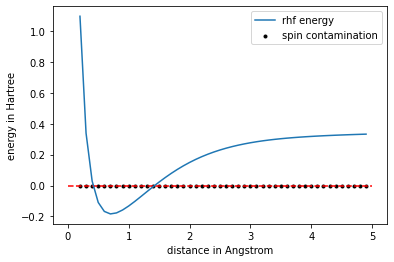

In [21]:
import matplotlib.pyplot as plt
p = plt.plot(distances, energies_rhf, label="rhf energy")
plt.scatter(distances, spincont_rhf, label="spin contamination", color="black", marker=".")
plt.xlabel("distance in Angstrom")
plt.ylabel("energy in Hartree")
plt.hlines(0, 0, 5, color="red", linestyles="--")
plt.legend(loc="upper right")
plt.savefig("/user/gent/440/vsc44013/Bachelor_project/Bachelor_project/theory/outline_BachelorProject/notes/figures/rhf.png")

In [23]:
import numpy as np
distances = np.arange(0.2, 5, 0.1)
energies_uhf = []
spincont_uhf = []
for distance in distances:
    h2 = Hartree_fock.UHFMolecule(f"""
    H 0 0 0 
    H 0 0 {distance}
    """)
    h2.setConvergence(1e-12)
    E = h2.iterator(mute=True)
    energies_uhf.append(E[0] - 2*h_energy)
    spincont_uhf.append(h2.getSpinContamination())

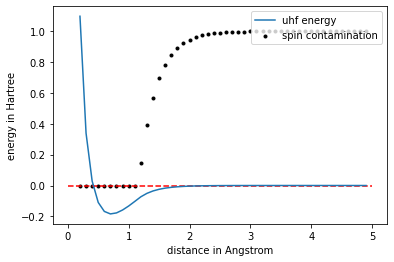

In [24]:
p = plt.plot(distances, energies_uhf, label="uhf energy")
plt.hlines(0, 0, 5, color="red", linestyles="--")
plt.scatter(distances, spincont_uhf, color="black", marker=".", label="spin contamination")
plt.xlabel("distance in Angstrom")
plt.ylabel("energy in Hartree")
plt.legend(loc="upper right")
plt.savefig("/user/gent/440/vsc44013/Bachelor_project/Bachelor_project/theory/outline_BachelorProject/notes/figures/uhf.png")

In [35]:
distances = np.arange(0.2, 5, 0.1)
energies_cuhf = []
spincont_cuhf = []
for distance in distances:
    h2 = Hartree_fock.CUHFMolecule(f"""
    H 0 0 0 
    H 0 0 {distance}
    """)
    h2.setConvergence(1e-12)
    E = h2.iterator(mute=True, criterion="energy", mixedGuess=True)
    energies_cuhf.append(E[0] - 2*h_energy)
    spincont_cuhf.append(h2.getSpinContamination())


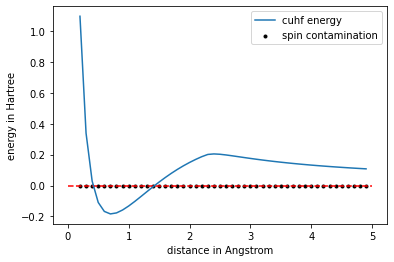

In [36]:
import matplotlib.pyplot as plt
p = plt.plot(distances, energies_cuhf, label="cuhf energy")
plt.hlines(0, 0, 5, color="red", linestyles="--")
plt.scatter(distances, spincont_cuhf, color="black", marker=".", label="spin contamination")
plt.xlabel("distance in Angstrom")
plt.ylabel("energy in Hartree")
plt.legend(loc="upper right")
plt.savefig("/user/gent/440/vsc44013/Bachelor_project/Bachelor_project/theory/outline_BachelorProject/notes/figures/cuhf_mix.png")

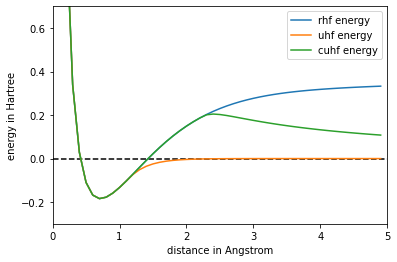

In [31]:
energies = np.array([energies_rhf, energies_uhf, energies_cuhf]).T
p = plt.plot(distances, energies)
plt.hlines(0, 0, 5, color="black", linestyles="--")
plt.xlabel("distance in Angstrom")
plt.ylabel("energy in Hartree")
plt.legend(["rhf energy", "uhf energy", "cuhf energy"], loc="upper right")
plt.axis([0, 5, -0.3, 0.7])
plt.savefig("/user/gent/440/vsc44013/Bachelor_project/Bachelor_project/theory/outline_BachelorProject/notes/figures/combo.png")

In [32]:
distances = np.arange(0.2, 5, 0.1)
energies_cuhf = []
spincont_cuhf = []
for distance in distances:
    h2 = Hartree_fock.CUHFMolecule(f"""
    H 0 0 0 
    H 0 0 {distance}
    """)
    h2.setConvergence(1e-12)
    E = h2.iterator(mute=True, criterion="energy", mixedGuess=False)
    energies_cuhf.append(E[0] - 2*h_energy)
    spincont_cuhf.append(h2.getSpinContamination())

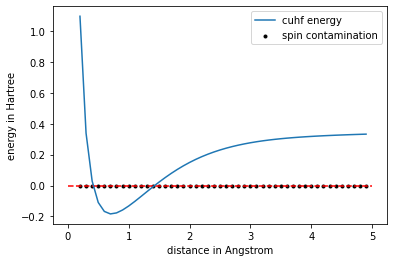

In [34]:
import matplotlib.pyplot as plt
p = plt.plot(distances, energies_cuhf, label="cuhf energy")
plt.hlines(0, 0, 5, color="red", linestyles="--")
plt.scatter(distances, spincont_cuhf, color="black", marker=".", label="spin contamination")
plt.xlabel("distance in Angstrom")
plt.ylabel("energy in Hartree")
plt.legend(loc="upper right")
plt.savefig("/user/gent/440/vsc44013/Bachelor_project/Bachelor_project/theory/outline_BachelorProject/notes/figures/cuhf_nomix.png")

The CIS data still needs to be checked. We will already generate some data for $H_3$ in STO-3G.


In [5]:
psi4.set_options({"basis":"sto-3g"})
h3_uhf = Hartree_fock.UHFMolecule("""
H 0 0 0
H 0 0.86602540378 0.5
H 0 0 1
units angstrom""")
h3_uhf.setConvergence(1e-12)
end_data = h3_uhf.iterator(mute=True, criterion="energy")
end_data

(-1.335980054177698, 160)

In [9]:
h3_uhf_cis = CISMolecule(h3_uhf)


In [13]:
h3_uhf_cis.GetExitations("/user/gent/440/vsc44013/Bachelor_project/Bachelor_project/theory/outline_BachelorProject/data/check.txt")

In [14]:
psi4.set_options({"basis":"sto-3g"})
h3_uhf = Hartree_fock.CUHFMolecule("""
H 0 0 0
H 0 0.86602540378 0.5
H 0 0 1
units angstrom""")
h3_uhf.setConvergence(1e-12)
end_data = h3_uhf.iterator(mute=True, criterion="energy")
end_data

(-1.3281757555248146, 38)

In [15]:
h3_uhf_cis = CISMolecule(h3_uhf)
h3_uhf_cis.GetExitations("/user/gent/440/vsc44013/Bachelor_project/Bachelor_project/theory/outline_BachelorProject/data/check.txt")

In [16]:
h3_uhf_cis.displayCISHamiltonian()

array([[ 6.56282676e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.48938117e-01, -2.19067178e-07,
        -3.26572510e-05,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  5.75899013e-01,  2.20943287e-07,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  9.89372036e-02,  8.97616909e-07],
       [ 0.00000000e+00,  2.20943287e-07,  7.12888294e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  8.97616909e-07, -1.36662263e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         3.54760812e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.48938117e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  5.74723358e-01, -3.67325059e-11,
        -1.13633455e-01,  0.00000000e+00,  0.00000000e+00],
       [-2.19067178e-07,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -3.67325059e-11,  7.390867

In [17]:
h3_uhf_cis.excitations

[(0, 3), (0, 4), (0, 5), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5)]